## Imoport the required libraries

In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /usr/share/nltk_data...


True

In [2]:
import pandas as pd
import sklearn
import numpy as np
import re
import nltk

import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import string

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

from skopt import BayesSearchCV

from wordcloud import WordCloud,STOPWORDS
import numpy as np
import tensorflow as tf

import pickle
import re
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB


from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D, GRU
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

from transformers import TFBertForSequenceClassification
from transformers import BertTokenizer


# allow display of multiple outputs by running one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from warnings import filterwarnings
filterwarnings("ignore")

2022-11-08 09:43:45.838041: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 09:43:45.839066: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 09:43:45.840288: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 09:43:45.841113: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 09:43:45.841871: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

## Read the dataset

In [3]:
data = pd.read_csv('../input/mental-health-data/Mental_classes_data.csv')
data.head()

,location,tweetcreatedts,text,class
0,the nationwood street,2021-02-08 19:07:40+00:00,RT @maideeeni: I want to say a very big thank ...,anxiety
1,RH Waiting For Update Planet,2021-02-03 23:58:40+00:00,@AisYalcaE @clyrhck Done! I just need 320! Tha...,lonely
2,Any pronouns ¡ GMT+8,2021-01-27 23:57:59+00:00,@SAD_istfied I'm gonna cry /pos,stress
3,........,2021-02-03 23:58:23+00:00,RT @JoshOfficial___: I need a consistent fuck ...,anxiety
4,"St Louis, MO",2021-02-12 20:27:58+00:00,RT @mikegolicjr: glad we're finally talking ab...,normal


## Check the data quality

In [4]:
#find duplicate rows across all columns
print('Number of the duplicated rows= ',data.duplicated().sum())
data = data.drop_duplicates()
print('Number of the duplicated rows after dropping the duplicated rows= ',data.duplicated().sum())

# summary of the number of nulls
print('Total missing values = ', data.isna().sum().sum())

print('Number of nulls in each column:')
data.isna().sum()
print('________________________________________________________________')

# count the ratio of missing values
total_miss = data.isnull().sum()
percent_miss = (total_miss/data.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
missing_data.sort_values(by='Total missing',ascending=False)
data

Number of the duplicated rows=  7763
Number of the duplicated rows after dropping the duplicated rows=  0
Total missing values =  10414
Number of nulls in each column:


location          10414
tweetcreatedts        0
text                  0
class                 0
dtype: int64

________________________________________________________________


,Total missing,% missing
location,10414,32.540699
tweetcreatedts,0,0.000000
text,0,0.000000
class,0,0.000000


,location,tweetcreatedts,text,class
0,the nationwood street,2021-02-08 19:07:40+00:00,RT @maideeeni: I want to say a very big thank ...,anxiety
1,RH Waiting For Update Planet,2021-02-03 23:58:40+00:00,@AisYalcaE @clyrhck Done! I just need 320! Tha...,lonely
2,Any pronouns ¡ GMT+8,2021-01-27 23:57:59+00:00,@SAD_istfied I'm gonna cry /pos,stress
3,........,2021-02-03 23:58:23+00:00,RT @JoshOfficial___: I need a consistent fuck ...,anxiety
4,"St Louis, MO",2021-02-12 20:27:58+00:00,RT @mikegolicjr: glad we're finally talking ab...,normal
...,...,...,...,...
39757,"Oklahoma, USA",2021-01-27 23:59:00+00:00,@undeervtuber That nervous about being there?,anxiety
39758,NaN,2021-02-12 20:46:01+00:00,@Adsavage11235 @x_Beast17_x @WWE @USA_Network ...,normal
39760,hogwarts,2021-02-12 20:46:01+00:00,RT @threenxq: The Korean light is so cheating ...,normal
39761,"Charlotte, NC",2021-01-27 23:58:57+00:00,Im nervous ash to fly though,anxiety


<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

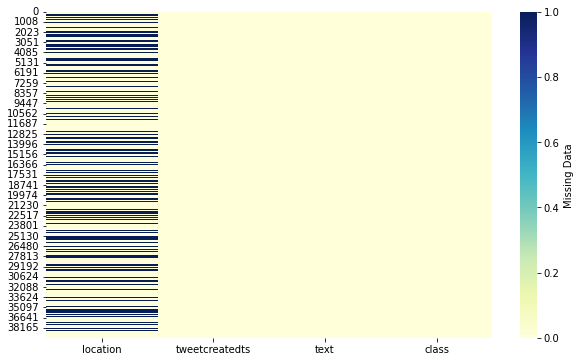

In [5]:
# visualize the heatmap of the missing values in the location column
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

## Make data exploration

In [6]:
# make new copy from the dataframe to make the exploration on
data_copy = data.copy()
data_copy

,location,tweetcreatedts,text,class
0,the nationwood street,2021-02-08 19:07:40+00:00,RT @maideeeni: I want to say a very big thank ...,anxiety
1,RH Waiting For Update Planet,2021-02-03 23:58:40+00:00,@AisYalcaE @clyrhck Done! I just need 320! Tha...,lonely
2,Any pronouns ¡ GMT+8,2021-01-27 23:57:59+00:00,@SAD_istfied I'm gonna cry /pos,stress
3,........,2021-02-03 23:58:23+00:00,RT @JoshOfficial___: I need a consistent fuck ...,anxiety
4,"St Louis, MO",2021-02-12 20:27:58+00:00,RT @mikegolicjr: glad we're finally talking ab...,normal
...,...,...,...,...
39757,"Oklahoma, USA",2021-01-27 23:59:00+00:00,@undeervtuber That nervous about being there?,anxiety
39758,NaN,2021-02-12 20:46:01+00:00,@Adsavage11235 @x_Beast17_x @WWE @USA_Network ...,normal
39760,hogwarts,2021-02-12 20:46:01+00:00,RT @threenxq: The Korean light is so cheating ...,normal
39761,"Charlotte, NC",2021-01-27 23:58:57+00:00,Im nervous ash to fly though,anxiety


In [7]:
data_copy['class'].value_counts()

anxiety    10728
normal     10000
stress      6260
lonely      5015
Name: class, dtype: int64

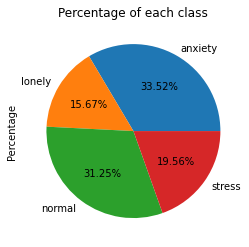

In [8]:
# visualize the percentage of each class by pie chart
plot = data_copy.groupby('class').size().plot(kind="pie", autopct=lambda p: '{:.2f}%'.format(p), ylabel='Percentage', title='Percentage of each class')


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Class Distribution Over Entries')

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Frequency')

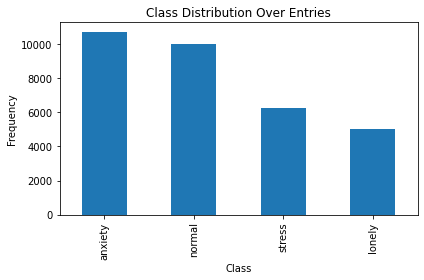

In [9]:
# visualize the frequency of each class
plt.figure()
ax = data_copy['class'].value_counts().plot(kind='bar')

ax.set_title('Class Distribution Over Entries')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [10]:
# fill the null values in the location column with word 'other'
data_copy['location']=data_copy['location'].fillna('other')

In [11]:
data_copy['location'].value_counts()

other              10414
United States        262
she/her              236
Los Angeles, CA      167
California, USA      149
                   ...  
Mid-West               1
SHE¡THEY               1
19\She\Her             1
Carolina's             1
Doylestown, PA         1
Name: location, Length: 11404, dtype: int64

<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:xlabel='location', ylabel='count'>

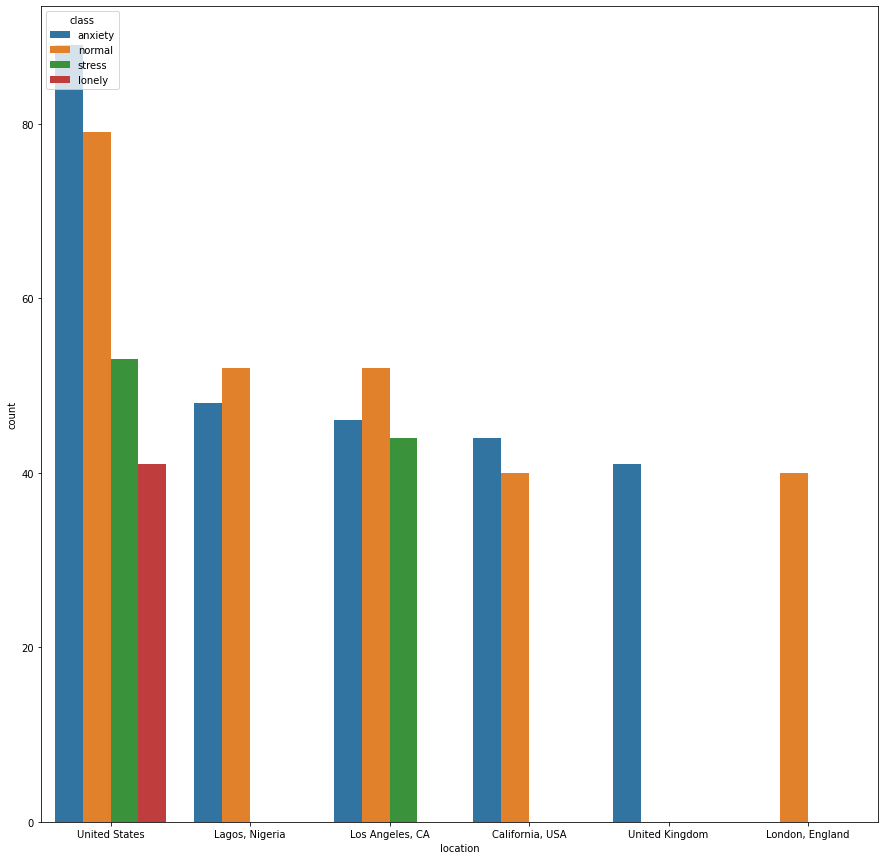

In [12]:
# top countries that have mental health problem
data_copy.drop(data_copy[(data_copy['location'] =='other') | (data_copy['location'] == 'she/her')].index, inplace=True)

count=data_copy[['location','class']].groupby(['class'])
fre=count['location'].value_counts()
tt=fre.reset_index(name='count')
tt=tt.sort_values(by='count',ascending=False).head(13)
plt.figure(figsize=(15,15))
sns.barplot(x=tt['location'], y=tt['count'],hue=tt['class'])
plt.savefig("distribution of classes over the most top countries have mental health problems.png", dpi=100)


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Class Distribution Over United States')

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Frequency')

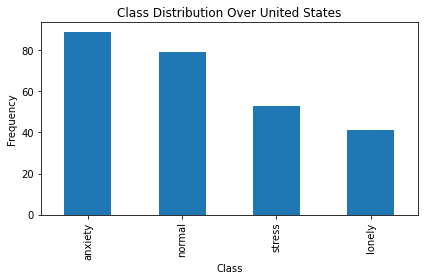

In [13]:
plt.figure()
ax =data_copy[data_copy['location']=='United States']['class'].value_counts().plot(kind='bar')
ax.set_title('Class Distribution Over United States')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [14]:
# convert the type of the tweetcreatedts column into datetime type
data_copy['tweetcreatedts']=pd.to_datetime(data_copy['tweetcreatedts'], format="%Y/%m/%d")
data_copy['tweetcreatedts']


0       2021-02-08 19:07:40+00:00
1       2021-02-03 23:58:40+00:00
2       2021-01-27 23:57:59+00:00
3       2021-02-03 23:58:23+00:00
4       2021-02-12 20:27:58+00:00
                   ...           
39756   2021-02-09 15:42:53+00:00
39757   2021-01-27 23:59:00+00:00
39760   2021-02-12 20:46:01+00:00
39761   2021-01-27 23:58:57+00:00
39763   2021-02-03 23:59:01+00:00
Name: tweetcreatedts, Length: 21353, dtype: datetime64[ns, UTC]

In [15]:
# split the year, month, and day from the date
data_copy['Year'] =data_copy['tweetcreatedts'].dt.year
data_copy['Month'] = data_copy['tweetcreatedts'].dt.month
data_copy['Day'] = data_copy['tweetcreatedts'].dt.day

In [16]:
# get the week number and the day name from the date column
data_copy['Week_Number'] = data_copy['tweetcreatedts'].dt.isocalendar().week
data_copy['day_name']=data_copy['tweetcreatedts'].dt.day_name()
data_copy

,location,tweetcreatedts,text,class,Year,Month,Day,Week_Number,day_name
0,the nationwood street,2021-02-08 19:07:40+00:00,RT @maideeeni: I want to say a very big thank ...,anxiety,2021,2,8,6,Monday
1,RH Waiting For Update Planet,2021-02-03 23:58:40+00:00,@AisYalcaE @clyrhck Done! I just need 320! Tha...,lonely,2021,2,3,5,Wednesday
2,Any pronouns ¡ GMT+8,2021-01-27 23:57:59+00:00,@SAD_istfied I'm gonna cry /pos,stress,2021,1,27,4,Wednesday
3,........,2021-02-03 23:58:23+00:00,RT @JoshOfficial___: I need a consistent fuck ...,anxiety,2021,2,3,5,Wednesday
4,"St Louis, MO",2021-02-12 20:27:58+00:00,RT @mikegolicjr: glad we're finally talking ab...,normal,2021,2,12,6,Friday
...,...,...,...,...,...,...,...,...,...
39756,Việt Nam,2021-02-09 15:42:53+00:00,"#Chanyeol\nSorry,Because l am uneducated,I wan...",lonely,2021,2,9,6,Tuesday
39757,"Oklahoma, USA",2021-01-27 23:59:00+00:00,@undeervtuber That nervous about being there?,anxiety,2021,1,27,4,Wednesday
39760,hogwarts,2021-02-12 20:46:01+00:00,RT @threenxq: The Korean light is so cheating ...,normal,2021,2,12,6,Friday
39761,"Charlotte, NC",2021-01-27 23:58:57+00:00,Im nervous ash to fly though,anxiety,2021,1,27,4,Wednesday


<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:xlabel='day_name', ylabel='count'>

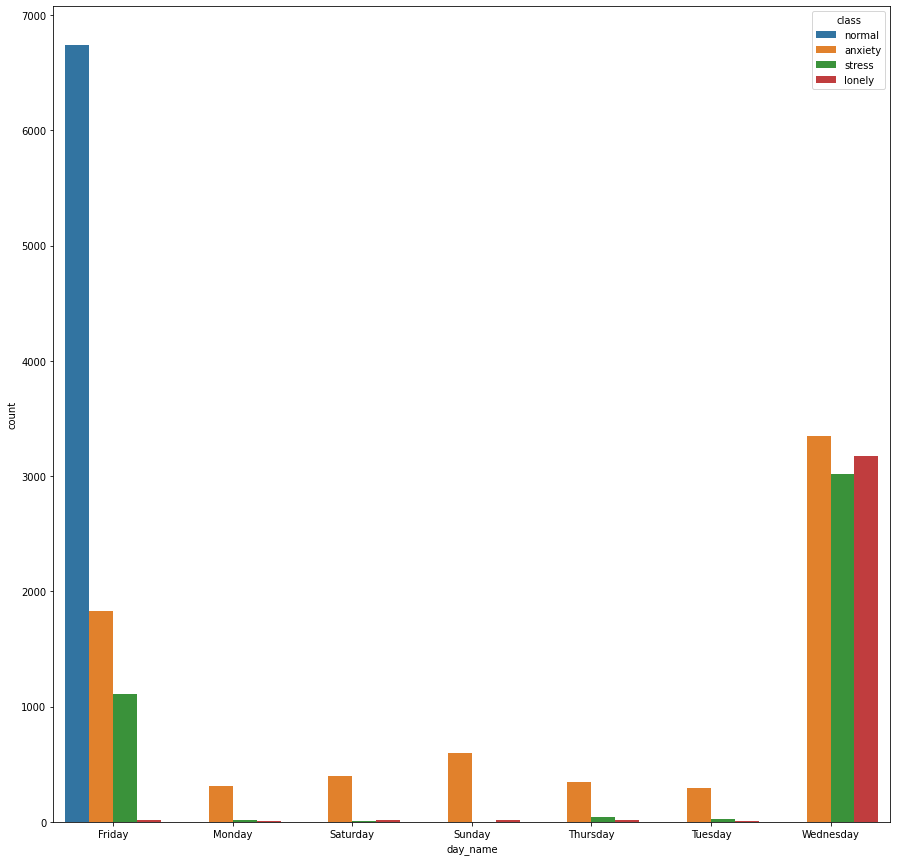

In [17]:
# visualize the days of the week that people suffer from mental health problems
week=data_copy[['day_name','class']].groupby(['day_name'])
new=week['class'].value_counts()
cc=new.reset_index(name='count')
plt.figure(figsize=(15,15))
sns.barplot(x=cc['day_name'], y=cc['count'],hue=cc['class'])

plt.savefig("distribution of classes over day of the week .png", dpi=100)

## Data preprocessing

In [18]:
data=data[['text','class']]
data

,text,class
0,RT @maideeeni: I want to say a very big thank ...,anxiety
1,@AisYalcaE @clyrhck Done! I just need 320! Tha...,lonely
2,@SAD_istfied I'm gonna cry /pos,stress
3,RT @JoshOfficial___: I need a consistent fuck ...,anxiety
4,RT @mikegolicjr: glad we're finally talking ab...,normal
...,...,...
39757,@undeervtuber That nervous about being there?,anxiety
39758,@Adsavage11235 @x_Beast17_x @WWE @USA_Network ...,normal
39760,RT @threenxq: The Korean light is so cheating ...,normal
39761,Im nervous ash to fly though,anxiety


In [19]:
# prepare the preprocessing function to clean the dataset
cachedStopWords = list(esw)
lemmatizer=WordNetLemmatizer()
#ps = PorterStemmer()

def lemmatize_article(sentence):
    sentence = word_tokenize(sentence)
    res = ''
    for word, tag in pos_tag(sentence):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        word = lemmatizer.lemmatize(word, wntag) if wntag else word
        res += word + ' '
    return res


def remove_stop_words(sentence):
    return ' '.join([word for word in sentence.split() if word not in cachedStopWords])
    
def remove_short(sentence):
    return ' '.join([word for word in sentence.split() if len(word) >= 3])
    
def remove_digits(sentence):
    return ' '.join([i for i in sentence.split() if not i.isdigit()])
    
def preprocess(all_texts):
    all_texts = list(map(lambda x: x.lower(), all_texts))
    all_texts = list(map(lambda x: x.translate(str.maketrans('', '', string.punctuation)), all_texts))
    all_texts = list(map(lambda x: lemmatize_article(x), all_texts))
    all_texts = list(map(lambda x: x.strip(), all_texts))
    all_texts = list(map(lambda x: remove_stop_words(x), all_texts))
    all_texts = list(map(lambda x: remove_short(x), all_texts))
    all_texts = list(map(lambda x: remove_digits(x), all_texts))
    return all_texts

In [20]:
# remove the mentions and the urls from the text data
data['text'] = data['text'].str.replace(r'\s*@\w+', '', regex = True)
data['text'] = data['text'].str.replace(r'\s*\B@\w+', '', regex = True)
data['text'] = data['text'].str.replace(r'\s*@\S+', '', regex = True)
data['text'] = data['text'].str.replace(r'\s*@\S+\b', '', regex = True)
data['text'] = data['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
data


,text,class
0,RT: I want to say a very big thank you to ever...,anxiety
1,Done! I just need 320! Thanks for the chance!,lonely
2,I'm gonna cry /pos,stress
3,RT: I need a consistent fuck buddy,anxiety
4,RT: glad we're finally talking about Deshaun a...,normal
...,...,...
39757,That nervous about being there?,anxiety
39758,They said unity pal,normal
39760,RT: The Korean light is so cheating,normal
39761,Im nervous ash to fly though,anxiety


In [21]:
# apply the preprocessing function on the data
data['text'] = preprocess(data['text'])
data

,text,class
0,want say big thank single reach just make sure...,anxiety
1,just need thanks chance,lonely
2,gon,stress
3,need consistent fuck buddy,anxiety
4,glad finally talk deshaun denver loud,normal
...,...,...
39757,nervous,anxiety
39758,say unity pal,normal
39760,korean light cheating,normal
39761,nervous ash fly,anxiety


In [22]:
data = pd.DataFrame(data)
data.head()

,text,class
0,want say big thank single reach just make sure...,anxiety
1,just need thanks chance,lonely
2,gon,stress
3,need consistent fuck buddy,anxiety
4,glad finally talk deshaun denver loud,normal


### Visualize the most repeated words in each class

<Figure size 2880x4320 with 0 Axes>

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'lonely')

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'normal')

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'anxiety')

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'stress')

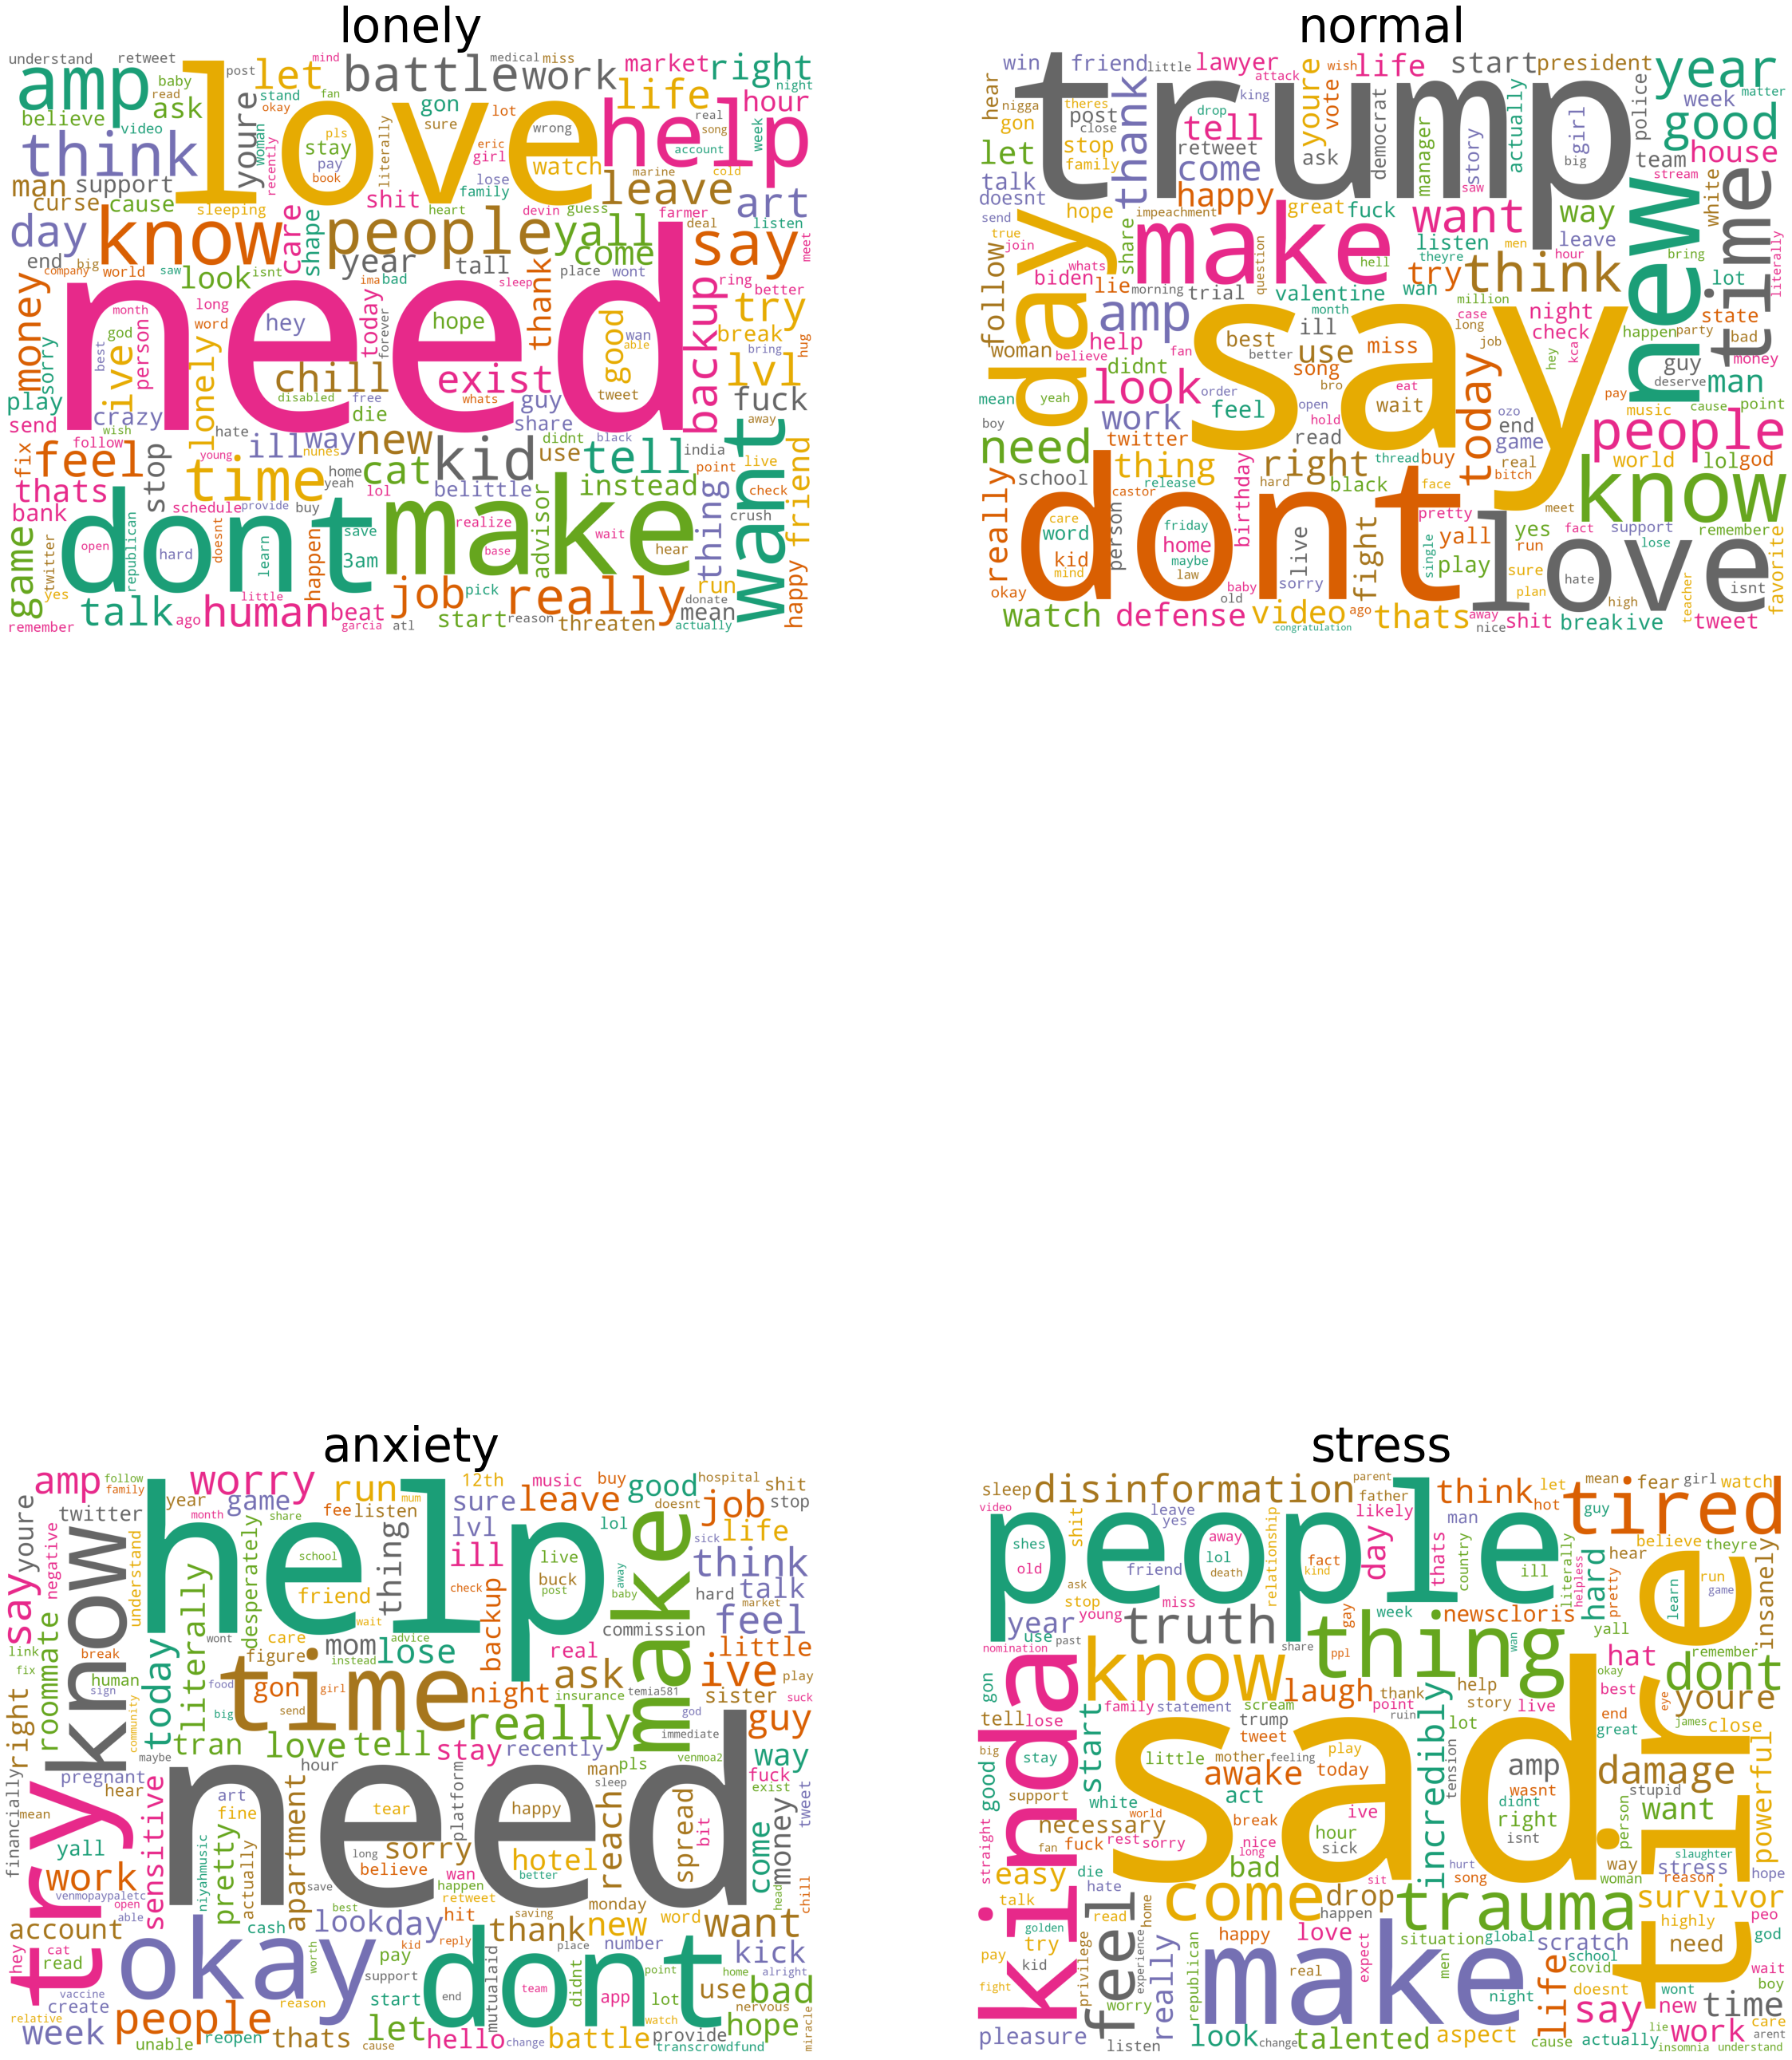

In [23]:
plt.figure(figsize=(40,60))
subset = data[data['class']=='lonely']
text_cleaned = subset.text.values
cloud1=WordCloud(stopwords=STOPWORDS,background_color='white',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text_cleaned))

plt.subplot(2,2,1)
plt.axis('off')
plt.title("lonely",fontsize=60)
plt.imshow(cloud1)


subset = data[data['class']=='normal']
text_cleaned = subset.text.values
cloud2 = WordCloud(stopwords=STOPWORDS,background_color='white',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text_cleaned))

plt.subplot(2,2,2)
plt.axis('off')
plt.title("normal",fontsize=60)
plt.imshow(cloud2)

subset = data[data['class']=='anxiety']
text_cleaned = subset.text.values
cloud3 = WordCloud(stopwords=STOPWORDS,background_color='white',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text_cleaned))

plt.subplot(2,2,3)
plt.axis('off')
plt.title("anxiety",fontsize=60)
plt.imshow(cloud3)


subset = data[data['class']=='stress']
text_cleaned = subset.text.values
cloud4 = WordCloud(stopwords=STOPWORDS,background_color='white',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text_cleaned))

plt.subplot(2,2,4)
plt.axis('off')
plt.title("stress",fontsize=60)
plt.imshow(cloud4)


## Split the features and the label to be prepared to used in the classification problem

In [24]:
X = data['text'].values
Y = data['class'].values

## Make vectorization for the features (text column)

In [25]:
td = TfidfVectorizer(max_features = 4500)
X = td.fit_transform(X).toarray()

## Split the data into trainind and test parts by percentage 70% : 30%

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state = 0)

## Start the modeling part

In [27]:
models_results = []

## Start with training and testing the models with the default hyperparameters
Models:

2.   LogisticRegression
3.   LinearSVC
4.   RandomForestClassifier

In [28]:
classifiers = [
    LogisticRegression(solver="sag", random_state=42),
    LinearSVC(random_state=42),
    RandomForestClassifier(random_state=1),
]
# get names of the objects in list (too lazy for c&p...)
names = [re.match(r"[^\(]+", name.__str__())[0] for name in classifiers]
print(f"Classifiers to test: {names}")

Classifiers to test: ['LogisticRegression', 'LinearSVC', 'RandomForestClassifier']


In [29]:
%%time
# test all classifiers and save pred. results on test data
results = {}
for name, clf in zip(names, classifiers):
    print(f"\n Training classifier: {name}")
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)

    models_results.append({"model": f"{name} TF-IDF", "result": accuracy_score(y_test, prediction)*100})
    print(f'Accuracy for {name}: ', accuracy_score(y_test, prediction))
    report = sklearn.metrics.classification_report(y_test, prediction)
    results[name] = report


 Training classifier: LogisticRegression
Accuracy for LogisticRegression:  0.7489844807832517

 Training classifier: LinearSVC
Accuracy for LinearSVC:  0.7381522758046037

 Training classifier: RandomForestClassifier
Accuracy for RandomForestClassifier:  0.7629413602749714
CPU times: user 4min 20s, sys: 646 ms, total: 4min 20s
Wall time: 4min 21s


In [30]:
for k, v in results.items():
    print(f"Results for {k}:")
    print(f"{v}\n")

Results for LogisticRegression:
              precision    recall  f1-score   support

     anxiety       0.72      0.72      0.72      3260
      lonely       0.46      0.34      0.39      1495
      normal       0.77      0.90      0.83      3045
      stress       0.93      0.88      0.91      1801

    accuracy                           0.75      9601
   macro avg       0.72      0.71      0.71      9601
weighted avg       0.74      0.75      0.74      9601


Results for LinearSVC:
              precision    recall  f1-score   support

     anxiety       0.69      0.71      0.70      3260
      lonely       0.44      0.37      0.40      1495
      normal       0.81      0.86      0.83      3045
      stress       0.91      0.90      0.91      1801

    accuracy                           0.74      9601
   macro avg       0.71      0.71      0.71      9601
weighted avg       0.73      0.74      0.73      9601


Results for RandomForestClassifier:
              precision    recall  f1

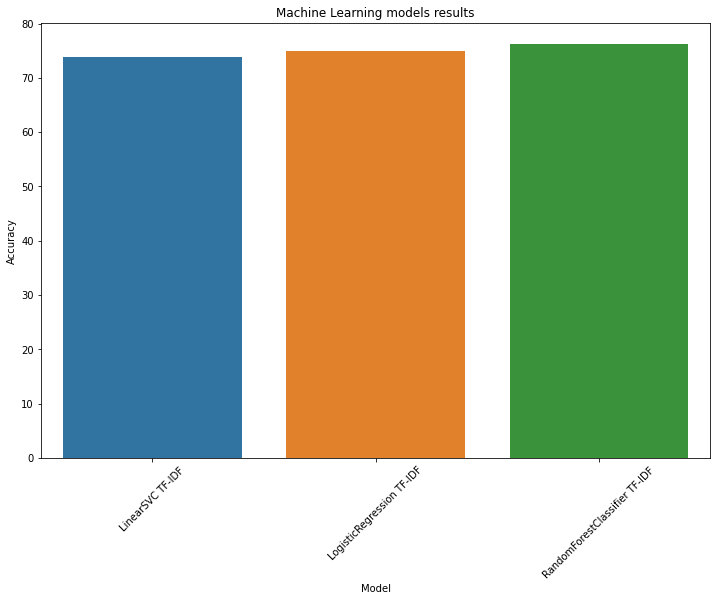

In [31]:
results = pd.DataFrame(models_results).sort_values(by="result")
results

plt.figure(figsize= (12, 8))
plt.title('Machine Learning models results')
ax = sns.barplot(x="model", y= "result", data=results)
ax.set(xlabel='Model', ylabel='Accuracy')
plt.xticks(rotation = 45);

In [32]:
models_results_after_tuned = []

### Hyperparameters tuning for logistic regression

In [33]:
%%time
# feature creation and modelling in a single function using pipeline
pipe = Pipeline([("lr", LogisticRegression())])

# define parameter space to test
params = {
    # parameters for the classifier
    # lr__solver points to lr->solver for the classifier
    'lr__solver' : ['newton-cg', 'lbfgs', 'liblinear'],
     # lr__penalty points to lr->penalty of the regularization to prevent the overfitting in the model  
    'lr__penalty': ['l2'],
      # lr__C points to lr->C values 
    'lr__C' : [1000, 100, 10, 1.0, 0.1, 0.01]
}
# n_jobs = -1 to work on all virtual processors
# cv = 3 means 3 k folds and 3 times for cross validation by changing each time the validation part
pipe_lr_clf = GridSearchCV(pipe, params, n_jobs=-1, scoring="accuracy",verbose=1, cv = 3)
# make fitting for the model to try all combinations created for the hyperparameters
pipe_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
CPU times: user 1min 35s, sys: 11.9 s, total: 1min 47s
Wall time: 28min 22s


GridSearchCV(cv=3, estimator=Pipeline(steps=[('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [1000, 100, 10, 1.0, 0.1, 0.01],
                         'lr__penalty': ['l2'],
                         'lr__solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=1)

In [34]:
# display the best combination of the hyperparameters and the best score on the training dataset using cross-validation method
best_params = pipe_lr_clf.best_params_
print(best_params)
print('best score {}'.format(pipe_lr_clf.best_score_))

{'lr__C': 1.0, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
best score 0.7547537439446413


In [35]:
# run the pipe with optimized parameters
pipe.set_params(**best_params).fit(X_train, y_train)

Pipeline(steps=[('lr', LogisticRegression())])

In [36]:
prediction = pipe.predict(X_test)
report = sklearn.metrics.classification_report(y_test, prediction)


print('\n Accuracy: ', accuracy_score(y_test, prediction))
models_results_after_tuned.append({"model": "Logistic Regression TF-IDF after tuning", "result": accuracy_score(y_test, prediction)*100})
print('\nClassification Report')
print('======================================================')
print('\n', report)



 Accuracy:  0.7489844807832517

Classification Report

               precision    recall  f1-score   support

     anxiety       0.72      0.72      0.72      3260
      lonely       0.46      0.34      0.39      1495
      normal       0.77      0.90      0.83      3045
      stress       0.93      0.88      0.90      1801

    accuracy                           0.75      9601
   macro avg       0.72      0.71      0.71      9601
weighted avg       0.74      0.75      0.74      9601



### Hyperparameters tuning for LinearSVC



In [37]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000]} 
  
grid = GridSearchCV(LinearSVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .............................C=0.1;, score=0.759 total time=   1.0s
[CV 2/5] END .............................C=0.1;, score=0.765 total time=   0.8s
[CV 3/5] END .............................C=0.1;, score=0.752 total time=   0.8s
[CV 4/5] END .............................C=0.1;, score=0.747 total time=   0.8s
[CV 5/5] END .............................C=0.1;, score=0.746 total time=   0.8s
[CV 1/5] END ...............................C=1;, score=0.750 total time=   0.9s
[CV 2/5] END ...............................C=1;, score=0.751 total time=   0.9s
[CV 3/5] END ...............................C=1;, score=0.750 total time=   0.9s
[CV 4/5] END ...............................C=1;, score=0.748 total time=   0.9s
[CV 5/5] END ...............................C=1;, score=0.737 total time=   0.9s
[CV 1/5] END ..............................C=10;, score=0.706 total time=   2.3s
[CV 2/5] END ..............................C=10;,

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             verbose=3)

In [38]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1}
LinearSVC(C=0.1)


In [39]:
grid_predictions = grid.predict(X_test)
  
report = sklearn.metrics.classification_report(y_test, grid_predictions)


print('\n Accuracy: ', accuracy_score(y_test, grid_predictions))
models_results_after_tuned.append({"model": "LinearSVM TF-IDF after tuning", "result": accuracy_score(y_test, grid_predictions)*100})

print('\nClassification Report')
print('======================================================')
print('\n', report)


 Accuracy:  0.7529424018331424

Classification Report

               precision    recall  f1-score   support

     anxiety       0.72      0.75      0.74      3260
      lonely       0.51      0.29      0.37      1495
      normal       0.76      0.90      0.82      3045
      stress       0.93      0.88      0.91      1801

    accuracy                           0.75      9601
   macro avg       0.73      0.71      0.71      9601
weighted avg       0.74      0.75      0.74      9601



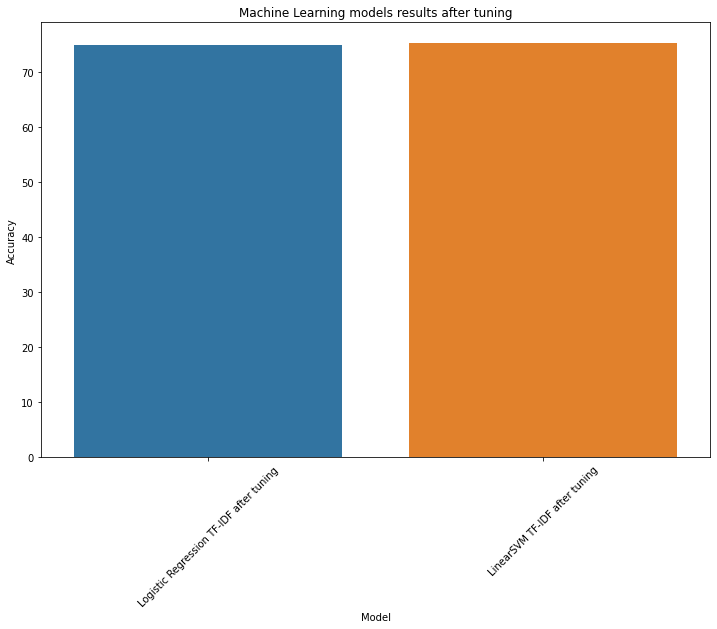

In [40]:
models_results_after_tuned = pd.DataFrame(models_results_after_tuned).sort_values(by="result")
models_results_after_tuned


plt.figure(figsize= (12, 8))
plt.title('Machine Learning models results after tuning')
ax = sns.barplot(x="model", y= "result", data=models_results_after_tuned)
ax.set(xlabel='Model', ylabel='Accuracy')
plt.xticks(rotation = 45);

## RNN models
### First model

In [41]:
models_DL_results_64 = []
models_DL_results_128 = []

In [42]:
# encode the labels
y =data['class']
le = LabelEncoder()
y = le.fit_transform(y)
y = y.reshape(-1,1)

In [43]:
# tokenize the features (text column)
max_words = 1000

tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(data['text'])
X = tok.texts_to_sequences(data['text'])
X = pad_sequences(X,value=0.0)

In [44]:
# split the data into training and testing parts
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [45]:
model1 = Sequential()
model1.add(Embedding(500, 120, input_length = X.shape[1]))
model1.add(SpatialDropout1D(0.4))
model1.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(4,activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 26, 120)           60000     
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 26, 120)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 176)               209088    
_________________________________________________________________
dense (Dense)                (None, 4)                 708       
Total params: 269,796
Trainable params: 269,796
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
model1.fit(X_train, y_train,batch_size=64,epochs=30, verbose = 'auto',validation_split=0.2)
accr1 = model1.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr1[0],accr1[1]))
models_DL_results_64.append({"model": "LSTM 176", "result": accr1[1]*100})

2022-11-08 10:20:24.771414: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
281/281 [==============================] - 42s 133ms/step - loss: 0.8034 - accuracy: 0.6765 - val_loss: 0.6002 - val_accuracy: 0.7623
Epoch 2/30
281/281 [==============================] - 37s 132ms/step - loss: 0.5769 - accuracy: 0.7735 - val_loss: 0.5840 - val_accuracy: 0.7646
Epoch 3/30
281/281 [==============================] - 37s 133ms/step - loss: 0.5559 - accuracy: 0.7749 - val_loss: 0.5813 - val_accuracy: 0.7713
Epoch 4/30
  5/281 [..............................] - ETA: 31s - loss: 0.4773 - accuracy: 0.8219

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


  6/281 [..............................] - ETA: 40s - loss: 0.5161 - accuracy: 0.8151

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


281/281 [==============================] - 37s 133ms/step - loss: 0.5430 - accuracy: 0.7801 - val_loss: 0.5759 - val_accuracy: 0.7728
Epoch 5/30
281/281 [==============================] - 37s 133ms/step - loss: 0.5338 - accuracy: 0.7832 - val_loss: 0.5815 - val_accuracy: 0.7751
Epoch 6/30
281/281 [==============================] - 37s 131ms/step - loss: 0.5274 - accuracy: 0.7858 - val_loss: 0.5751 - val_accuracy: 0.7766
Epoch 7/30
281/281 [==============================] - 37s 131ms/step - loss: 0.5208 - accuracy: 0.7849 - val_loss: 0.5736 - val_accuracy: 0.7757
Epoch 8/30
281/281 [==============================] - 37s 132ms/step - loss: 0.5158 - accuracy: 0.7900 - val_loss: 0.5724 - val_accuracy: 0.7719
Epoch 9/30
281/281 [==============================] - 37s 132ms/step - loss: 0.5098 - accuracy: 0.7892 - val_loss: 0.5749 - val_accuracy: 0.7742
Epoch 10/30
281/281 [==============================] - 37s 130ms/step - loss: 0.5026 - accuracy: 0.7910 - val_loss: 0.5753 - val_accuracy: 0.

301/301 [==============================] - 3s 9ms/step - loss: 0.6862 - accuracy: 0.7614
Test set
  Loss: 0.686
  Accuracy: 0.761


In [47]:
model1.fit(X_train, y_train,batch_size=128,epochs=30, verbose = 'auto',validation_split=0.2)
accr1 = model1.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr1[0],accr1[1]))
models_DL_results_128.append({"model": "LSTM 176", "result": accr1[1]*100})

Epoch 1/30
141/141 [==============================] - 21s 151ms/step - loss: 0.3406 - accuracy: 0.8469 - val_loss: 0.7153 - val_accuracy: 0.7494
Epoch 2/30
141/141 [==============================] - 22s 154ms/step - loss: 0.3364 - accuracy: 0.8473 - val_loss: 0.7204 - val_accuracy: 0.7543
Epoch 3/30
141/141 [==============================] - 21s 148ms/step - loss: 0.3296 - accuracy: 0.8516 - val_loss: 0.7384 - val_accuracy: 0.7534
Epoch 4/30
141/141 [==============================] - 21s 146ms/step - loss: 0.3237 - accuracy: 0.8555 - val_loss: 0.7350 - val_accuracy: 0.7478
Epoch 5/30
141/141 [==============================] - 21s 149ms/step - loss: 0.3189 - accuracy: 0.8574 - val_loss: 0.7463 - val_accuracy: 0.7518
Epoch 6/30
141/141 [==============================] - 20s 142ms/step - loss: 0.3178 - accuracy: 0.8554 - val_loss: 0.7599 - val_accuracy: 0.7454
Epoch 7/30
141/141 [==============================] - 21s 149ms/step - loss: 0.3129 - accuracy: 0.8592 - val_loss: 0.7682 - val_ac

301/301 [==============================] - 3s 10ms/step - loss: 0.8536 - accuracy: 0.7428
Test set
  Loss: 0.854
  Accuracy: 0.743


### Second model
using Embedding layer, 2 LSTM layers and 2 Dense layers + output

In [48]:
model2 = Sequential()
model2.add(Embedding(500,50,input_length=X.shape[1]))

model2.add(LSTM(200, return_sequences=True))
model2.add(LSTM(200))

model2.add(Dense(2000, activation='relu'))
model2.add(Dense(1500, activation='relu'))

model2.add(Dense(4, activation='softmax'))
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 26, 50)            25000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 26, 200)           200800    
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              402000    
_________________________________________________________________
dense_2 (Dense)              (None, 1500)              3001500   
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 6004      
Total params: 3,956,104
Trainable params: 3,956,104
Non-trainable params: 0
____________________________________________

In [49]:
model2.fit(X_train, y_train,batch_size=64,epochs=30, verbose = 'auto',validation_split=0.2)
accr2 = model2.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr2[0],accr2[1]))
models_DL_results_64.append({"model": "2 LSTM 200", "result": accr2[1]*100})

Epoch 1/30


2022-11-08 10:50:32.709948: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


281/281 [==============================] - 10s 15ms/step - loss: 0.8056 - accuracy: 0.6735 - val_loss: 0.6656 - val_accuracy: 0.7378
Epoch 2/30
281/281 [==============================] - 3s 10ms/step - loss: 0.6025 - accuracy: 0.7611 - val_loss: 0.6089 - val_accuracy: 0.7632
Epoch 3/30
281/281 [==============================] - 3s 10ms/step - loss: 0.5603 - accuracy: 0.7760 - val_loss: 0.5947 - val_accuracy: 0.7617
Epoch 4/30
281/281 [==============================] - 3s 10ms/step - loss: 0.5511 - accuracy: 0.7789 - val_loss: 0.5958 - val_accuracy: 0.7659
Epoch 5/30
281/281 [==============================] - 3s 11ms/step - loss: 0.5332 - accuracy: 0.7851 - val_loss: 0.6109 - val_accuracy: 0.7666
Epoch 6/30
281/281 [==============================] - 3s 10ms/step - loss: 0.5209 - accuracy: 0.7895 - val_loss: 0.5966 - val_accuracy: 0.7670
Epoch 7/30
281/281 [==============================] - 3s 10ms/step - loss: 0.5131 - accuracy: 0.7929 - val_loss: 0.5941 - val_accuracy: 0.7728
Epoch 8/3

301/301 [==============================] - 2s 6ms/step - loss: 1.1497 - accuracy: 0.7440
Test set
  Loss: 1.150
  Accuracy: 0.744


In [50]:
model2.fit(X_train, y_train,batch_size=128,epochs=30, verbose = 'auto',validation_split=0.2)
accr2 = model2.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr2[0],accr2[1]))
models_DL_results_128.append({"model": "2 LSTM 200", "result": accr2[1]*100})

Epoch 1/30
141/141 [==============================] - 2s 12ms/step - loss: 0.2963 - accuracy: 0.8608 - val_loss: 1.2548 - val_accuracy: 0.7550
Epoch 2/30
141/141 [==============================] - 2s 13ms/step - loss: 0.2426 - accuracy: 0.8778 - val_loss: 1.4669 - val_accuracy: 0.7322
Epoch 3/30
141/141 [==============================] - 2s 11ms/step - loss: 0.2244 - accuracy: 0.8843 - val_loss: 1.5932 - val_accuracy: 0.7257
Epoch 4/30
141/141 [==============================] - 2s 11ms/step - loss: 0.2205 - accuracy: 0.8855 - val_loss: 1.7515 - val_accuracy: 0.7483
Epoch 5/30
141/141 [==============================] - 2s 11ms/step - loss: 0.2197 - accuracy: 0.8862 - val_loss: 1.7618 - val_accuracy: 0.7326
Epoch 6/30
141/141 [==============================] - 2s 11ms/step - loss: 0.2161 - accuracy: 0.8889 - val_loss: 1.7605 - val_accuracy: 0.7331
Epoch 7/30
141/141 [==============================] - 2s 11ms/step - loss: 0.2172 - accuracy: 0.8878 - val_loss: 1.7864 - val_accuracy: 0.7289

301/301 [==============================] - 1s 4ms/step - loss: 2.1405 - accuracy: 0.7254
Test set
  Loss: 2.140
  Accuracy: 0.725


### Third model
using Embedding layer, 1 GRU layer and 5 Dense layer + output

In [51]:
model3 = Sequential()
model3.add(Embedding(500, 50, input_length=X.shape[1]))

model3.add(GRU(128))

model3.add(Dense(3000, activation='relu'))
model3.add(Dense(2000, activation='relu'))
model3.add(Dense(1000, activation='relu'))
model3.add(Dense(500, activation='relu'))
model3.add(Dense(200, activation='relu'))

model3.add(Dense(4, activation='softmax'))
model3.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 26, 50)            25000     
_________________________________________________________________
gru (GRU)                    (None, 128)               69120     
_________________________________________________________________
dense_4 (Dense)              (None, 3000)              387000    
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              6002000   
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dense_7 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_8 (Dense)              (None, 200)              

In [52]:
model3.fit(X_train, y_train,batch_size=64,epochs=30, verbose = 'auto',validation_split=0.2)
accr3 = model3.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr3[0],accr3[1]))
models_DL_results_64.append({"model": "GRU 128", "result": accr3[1]*100})

Epoch 1/30
281/281 [==============================] - 4s 9ms/step - loss: 0.7937 - accuracy: 0.6811 - val_loss: 0.6356 - val_accuracy: 0.7451
Epoch 2/30
281/281 [==============================] - 2s 7ms/step - loss: 0.6122 - accuracy: 0.7554 - val_loss: 0.6089 - val_accuracy: 0.7626
Epoch 3/30
281/281 [==============================] - 2s 8ms/step - loss: 0.5736 - accuracy: 0.7699 - val_loss: 0.6272 - val_accuracy: 0.7561
Epoch 4/30
281/281 [==============================] - 2s 7ms/step - loss: 0.5630 - accuracy: 0.7775 - val_loss: 0.6258 - val_accuracy: 0.7630
Epoch 5/30
281/281 [==============================] - 2s 7ms/step - loss: 0.5630 - accuracy: 0.7747 - val_loss: 0.6073 - val_accuracy: 0.7545
Epoch 6/30
281/281 [==============================] - 2s 7ms/step - loss: 0.5273 - accuracy: 0.7871 - val_loss: 0.5822 - val_accuracy: 0.7744
Epoch 7/30
281/281 [==============================] - 2s 7ms/step - loss: 0.5136 - accuracy: 0.7923 - val_loss: 0.6254 - val_accuracy: 0.7637
Epoch 

301/301 [==============================] - 1s 3ms/step - loss: 1.1236 - accuracy: 0.7487
Test set
  Loss: 1.124
  Accuracy: 0.749


In [53]:
model3.fit(X_train, y_train,batch_size=128,epochs=30, verbose = 'auto',validation_split=0.2)
accr3 = model3.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr3[0],accr3[1]))
models_DL_results_128.append({"model": "GRU 128", "result": accr3[1]*100})

Epoch 1/30
141/141 [==============================] - 1s 9ms/step - loss: 0.2480 - accuracy: 0.8750 - val_loss: 1.4396 - val_accuracy: 0.7594
Epoch 2/30
141/141 [==============================] - 1s 8ms/step - loss: 0.2284 - accuracy: 0.8814 - val_loss: 1.7502 - val_accuracy: 0.7429
Epoch 3/30
141/141 [==============================] - 1s 8ms/step - loss: 0.2177 - accuracy: 0.8847 - val_loss: 1.8549 - val_accuracy: 0.7414
Epoch 4/30
141/141 [==============================] - 1s 8ms/step - loss: 0.2231 - accuracy: 0.8830 - val_loss: 1.7285 - val_accuracy: 0.7599
Epoch 5/30
141/141 [==============================] - 1s 8ms/step - loss: 0.2201 - accuracy: 0.8844 - val_loss: 1.7941 - val_accuracy: 0.7480
Epoch 6/30
141/141 [==============================] - 1s 8ms/step - loss: 0.2223 - accuracy: 0.8842 - val_loss: 1.7643 - val_accuracy: 0.7454
Epoch 7/30
141/141 [==============================] - 1s 8ms/step - loss: 0.2170 - accuracy: 0.8872 - val_loss: 1.9134 - val_accuracy: 0.7494
Epoch 

301/301 [==============================] - 1s 3ms/step - loss: 1.7166 - accuracy: 0.7279
Test set
  Loss: 1.717
  Accuracy: 0.728


### Fourth model
using Embedding layer, 2 GRU layer and 3 Dense layer + output

In [54]:
model4 = Sequential()
model4.add(Embedding(600, 50, input_length=X.shape[1]))
model4.add(GRU(256, return_sequences=True))
model4.add(GRU(128))

model4.add(Dense(2500, activation='relu'))
model4.add(Dense(2000, activation='relu'))
model4.add(Dense(1000, activation='relu'))

model4.add(Dense(4, activation='softmax'))
model4.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

print(model4.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 26, 50)            30000     
_________________________________________________________________
gru_1 (GRU)                  (None, 26, 256)           236544    
_________________________________________________________________
gru_2 (GRU)                  (None, 128)               148224    
_________________________________________________________________
dense_10 (Dense)             (None, 2500)              322500    
_________________________________________________________________
dense_11 (Dense)             (None, 2000)              5002000   
_________________________________________________________________
dense_12 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_13 (Dense)             (None, 4)                

In [55]:
model4.fit(X_train, y_train,batch_size=64,epochs=30, verbose = 'auto',validation_split=0.2)
accr4 = model4.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr4[0],accr4[1]))
models_DL_results_64.append({"model": "GRU 256 - GRU 128", "result": accr4[1]*100})

Epoch 1/30
281/281 [==============================] - 6s 12ms/step - loss: 0.8125 - accuracy: 0.6743 - val_loss: 0.7364 - val_accuracy: 0.7032
Epoch 2/30
281/281 [==============================] - 3s 10ms/step - loss: 0.6201 - accuracy: 0.7514 - val_loss: 0.5927 - val_accuracy: 0.7710
Epoch 3/30
281/281 [==============================] - 3s 10ms/step - loss: 0.5676 - accuracy: 0.7703 - val_loss: 0.5795 - val_accuracy: 0.7730
Epoch 4/30
281/281 [==============================] - 3s 11ms/step - loss: 0.5413 - accuracy: 0.7836 - val_loss: 0.5724 - val_accuracy: 0.7730
Epoch 5/30
281/281 [==============================] - 3s 10ms/step - loss: 0.5203 - accuracy: 0.7885 - val_loss: 0.6069 - val_accuracy: 0.7679
Epoch 6/30
281/281 [==============================] - 3s 11ms/step - loss: 0.5106 - accuracy: 0.7894 - val_loss: 0.6072 - val_accuracy: 0.7697
Epoch 7/30
281/281 [==============================] - 3s 10ms/step - loss: 0.5007 - accuracy: 0.7952 - val_loss: 0.5971 - val_accuracy: 0.7701

301/301 [==============================] - 1s 4ms/step - loss: 1.3141 - accuracy: 0.7349
Test set
  Loss: 1.314
  Accuracy: 0.735


In [56]:
model4.fit(X_train, y_train,batch_size=128,epochs=30, verbose = 'auto',validation_split=0.2)
accr4 = model4.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr4[0],accr4[1]))
models_DL_results_128.append({"model": "GRU 256 - GRU 128", "result": accr4[1]*100})

Epoch 1/30
141/141 [==============================] - 2s 12ms/step - loss: 0.2208 - accuracy: 0.8867 - val_loss: 1.4442 - val_accuracy: 0.7518
Epoch 2/30
141/141 [==============================] - 2s 11ms/step - loss: 0.2014 - accuracy: 0.8943 - val_loss: 1.5721 - val_accuracy: 0.7434
Epoch 3/30
141/141 [==============================] - 2s 12ms/step - loss: 0.1921 - accuracy: 0.8972 - val_loss: 1.6913 - val_accuracy: 0.7393
Epoch 4/30
141/141 [==============================] - 2s 11ms/step - loss: 0.1897 - accuracy: 0.8989 - val_loss: 1.8494 - val_accuracy: 0.7400
Epoch 5/30
141/141 [==============================] - 2s 11ms/step - loss: 0.1968 - accuracy: 0.8958 - val_loss: 1.6258 - val_accuracy: 0.7284
Epoch 6/30
141/141 [==============================] - 2s 11ms/step - loss: 0.1954 - accuracy: 0.8968 - val_loss: 1.5953 - val_accuracy: 0.7389
Epoch 7/30
141/141 [==============================] - 2s 11ms/step - loss: 0.1946 - accuracy: 0.9009 - val_loss: 1.6027 - val_accuracy: 0.7402

301/301 [==============================] - 1s 4ms/step - loss: 1.9235 - accuracy: 0.7210
Test set
  Loss: 1.924
  Accuracy: 0.721


### Fifth model
using Embedding layer, 1 GRU layer, 1 LSTM and 3 Dense layer + output

In [57]:
model5 = Sequential()
model5.add(Embedding(600, 50, input_length=X.shape[1]))

model5.add(GRU(256, return_sequences=True))
model5.add(LSTM(256))

model5.add(Dense(2500, activation='relu'))
model5.add(Dense(2000, activation='relu'))
model5.add(Dense(1000, activation='relu'))

model5.add(Dense(4, activation='softmax'))
model5.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

print(model5.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 26, 50)            30000     
_________________________________________________________________
gru_3 (GRU)                  (None, 26, 256)           236544    
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_14 (Dense)             (None, 2500)              642500    
_________________________________________________________________
dense_15 (Dense)             (None, 2000)              5002000   
_________________________________________________________________
dense_16 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_17 (Dense)             (None, 4)                

In [58]:
model5.fit(X_train, y_train,batch_size=64,epochs=30, verbose = 'auto',validation_split=0.2)
accr5 = model5.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr5[0],accr5[1]))
models_DL_results_64.append({"model": "GRU 256 - LSTM 256", "result": accr5[1]*100})

Epoch 1/30
281/281 [==============================] - 7s 13ms/step - loss: 0.8083 - accuracy: 0.6730 - val_loss: 0.8622 - val_accuracy: 0.6626
Epoch 2/30
281/281 [==============================] - 3s 11ms/step - loss: 0.6074 - accuracy: 0.7580 - val_loss: 0.6702 - val_accuracy: 0.7016
Epoch 3/30
281/281 [==============================] - 3s 11ms/step - loss: 0.5732 - accuracy: 0.7688 - val_loss: 0.5951 - val_accuracy: 0.7601
Epoch 4/30
281/281 [==============================] - 3s 11ms/step - loss: 0.5489 - accuracy: 0.7793 - val_loss: 0.5854 - val_accuracy: 0.7628
Epoch 5/30
281/281 [==============================] - 3s 10ms/step - loss: 0.5297 - accuracy: 0.7837 - val_loss: 0.5896 - val_accuracy: 0.7726
Epoch 6/30
281/281 [==============================] - 3s 12ms/step - loss: 0.5098 - accuracy: 0.7928 - val_loss: 0.5980 - val_accuracy: 0.7695
Epoch 7/30
281/281 [==============================] - 3s 11ms/step - loss: 0.4971 - accuracy: 0.7978 - val_loss: 0.5984 - val_accuracy: 0.7692

301/301 [==============================] - 1s 5ms/step - loss: 1.3305 - accuracy: 0.7440
Test set
  Loss: 1.331
  Accuracy: 0.744


In [59]:
model5.fit(X_train, y_train,batch_size=128,epochs=30, verbose = 'auto',validation_split=0.2)
accr5 = model5.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr5[0],accr5[1]))
models_DL_results_128.append({"model": "GRU 256 - LSTM 256", "result": accr5[1]*100})

Epoch 1/30
141/141 [==============================] - 2s 14ms/step - loss: 0.2658 - accuracy: 0.8738 - val_loss: 1.3098 - val_accuracy: 0.7494
Epoch 2/30
141/141 [==============================] - 2s 13ms/step - loss: 0.2044 - accuracy: 0.8885 - val_loss: 1.5216 - val_accuracy: 0.7574
Epoch 3/30
141/141 [==============================] - 2s 13ms/step - loss: 0.2004 - accuracy: 0.8890 - val_loss: 1.6601 - val_accuracy: 0.7429
Epoch 4/30
141/141 [==============================] - 2s 13ms/step - loss: 0.1947 - accuracy: 0.8929 - val_loss: 1.7315 - val_accuracy: 0.7371
Epoch 5/30
141/141 [==============================] - 2s 14ms/step - loss: 0.1879 - accuracy: 0.8962 - val_loss: 1.9435 - val_accuracy: 0.7538
Epoch 6/30
141/141 [==============================] - 2s 14ms/step - loss: 0.1892 - accuracy: 0.8981 - val_loss: 1.7989 - val_accuracy: 0.7440
Epoch 7/30
141/141 [==============================] - 2s 15ms/step - loss: 0.1884 - accuracy: 0.8931 - val_loss: 1.8325 - val_accuracy: 0.7257

301/301 [==============================] - 1s 4ms/step - loss: 2.0733 - accuracy: 0.7227
Test set
  Loss: 2.073
  Accuracy: 0.723


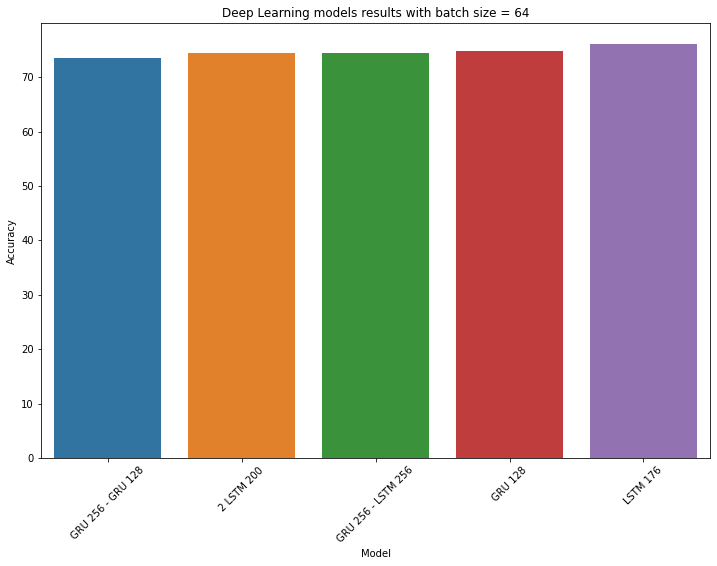

In [60]:
models_DL_results_64 = pd.DataFrame(models_DL_results_64).sort_values(by="result")
models_DL_results_64


plt.figure(figsize= (12, 8))
plt.title('Deep Learning models results with batch size = 64')
ax = sns.barplot(x="model", y= "result", data=models_DL_results_64)
ax.set(xlabel='Model', ylabel='Accuracy')
plt.xticks(rotation = 45);

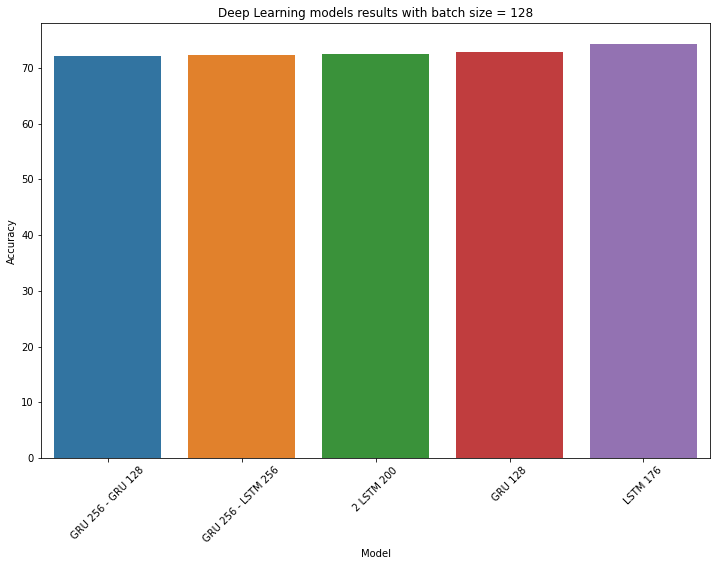

In [61]:
models_DL_results_128 = pd.DataFrame(models_DL_results_128).sort_values(by="result")
models_DL_results_128


plt.figure(figsize= (12, 8))
plt.title('Deep Learning models results with batch size = 128')
ax = sns.barplot(x="model", y= "result", data=models_DL_results_128)
ax.set(xlabel='Model', ylabel='Accuracy')
plt.xticks(rotation = 45);

# References:
SVM hyperparameter tuning using GRIDSEARCHCV: ML (2022) GeeksforGeeks. Available at: https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/ 

T, S.K. (2022) NLP: Sentiment Analysis Using LSTM, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/06/natural-language-processing-sentiment-analysis-using-lstm/ 

Learn hyperparameter search wrapper¶ (no date) Scikit. Available at: https://scikit-optimize.github.io/stable/auto_examples/sklearn-gridsearchcv-replacement.html 